<a href="https://colab.research.google.com/github/xyzaraa/spotify-analysis/blob/main/BigData_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Explanatory Data Analysis (before)

In [3]:
df = pd.read_csv('/content/spotify_songs.csv')

In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [22]:
print(df['playlist_genre'].value_counts())
print(f"Artist: {df['track_artist'].nunique()}")

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64
Artist: 10692


In [6]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [7]:
df.dropna()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [8]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [9]:
df.shape

(32833, 23)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [12]:
df.duplicated().sum()

0

## Data Visualization

### What is the correlation between each feature?



Let's start with correlation heatmap so we can see how the relation between each features in our data.

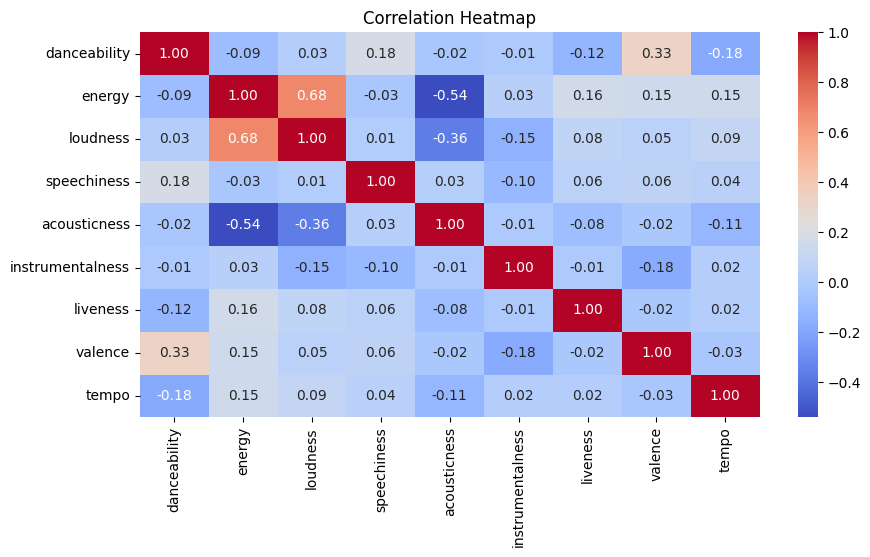

In [13]:
chosen = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
heat = df[chosen].corr()
plt.figure(figsize=(10,5))
sns.heatmap(heat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

As we can see, energy and loudness have a high correlation (0.68). The higher the loudness of a song, the greater the perceived energy in the song. This suggests that songs with louder or more dominant voices tend to have higher energy intensity. In addition, the valence and danceability features also have a fairly high correlation (0.33) which means that songs with a high level of danceability tend to have more positive vibes.

In contrast, acoustic features have a negative correlation with energy (-0.54). This means that the higher the acoustic value of a song, the lower the energy level, so the song tends to have a more calming or relaxing effect on the listener. The same can be seen with tempo, where slower tempos show a negative relationship with danceability (-0.33). This means that slow-tempo songs are usually less suitable for activities that involve movement such as dancing.

### Who's top artist by it's track popularity?

Here we can use bar chart to see who and how much their popularity. By using track_popularity, we can sort them into descending and show the only top 15 artists.

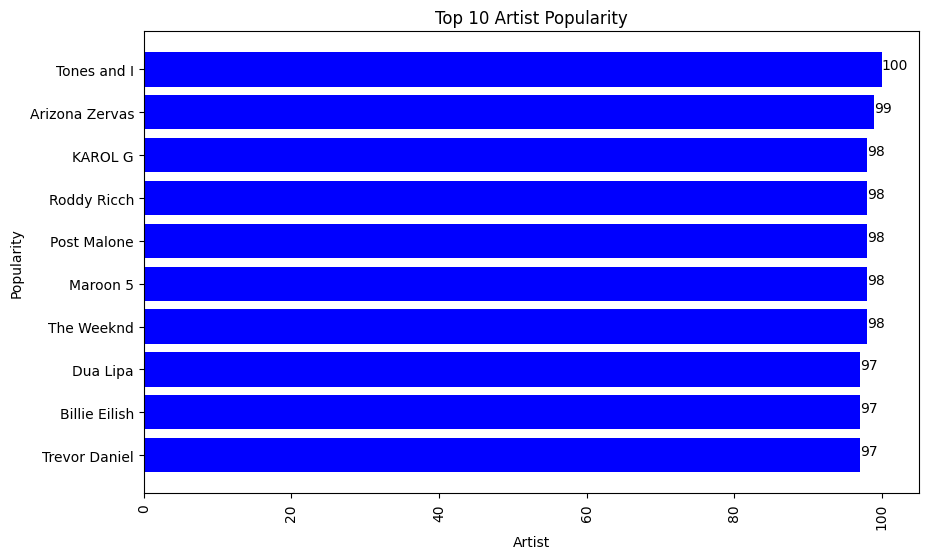

In [14]:
unique_artists = df.loc[df.groupby('track_artist')['track_popularity'].idxmax()]
top_15 = unique_artists.sort_values(by='track_popularity', ascending=False).head(10)

x = top_15['track_artist'].astype(str).values
y = top_15['track_popularity'].values

fig, ax = plt.subplots(figsize=(10, 6))
idx = np.arange(len(y))
ax.barh(x, y, color='blue')
for i, v in enumerate(y):
  ax.text(v, i, str(v), color = 'black')
ax.set_xlabel('Artist')
ax.set_ylabel('Popularity')
ax.set_title('Top 10 Artist Popularity')
ax.invert_yaxis()
plt.xticks(rotation=90)
plt.show()


Yup! Tones and I was ranked first followed by Arizona Zervas as second and Karol G as third. let's see what song brought them to the top ten...

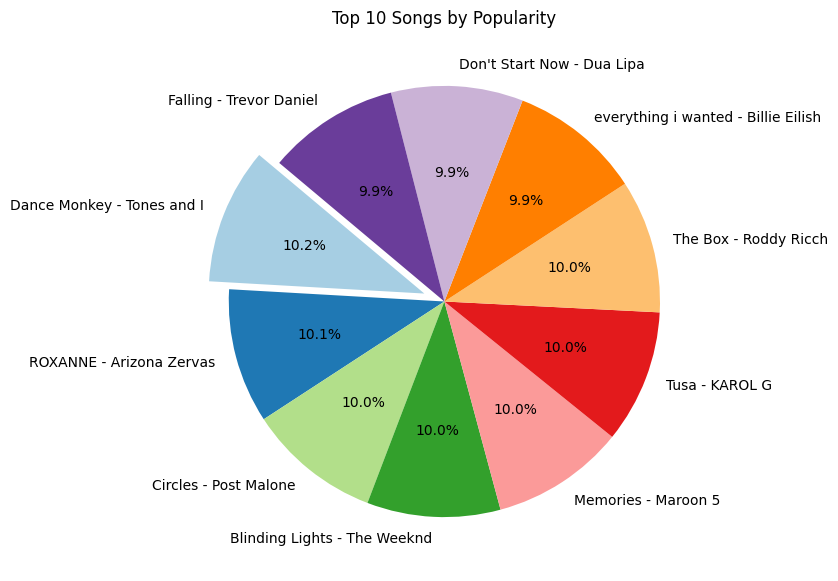

In [15]:
unique_artists = df.loc[df.groupby('track_name')['track_popularity'].idxmax()]
top_10 = unique_artists.sort_values(by='track_popularity', ascending=False).head(10)
labels = top_10['track_name'] + " - " + top_10['track_artist']
explode = [0.1 if i == 0 else 0 for i in range(len(top_10))]
x = labels
y = top_10['track_popularity']
plt.figure(figsize=(10, 7))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors)
plt.title('Top 10 Songs by Popularity')
plt.show()



Danggg, that one “COVID-19 vibes song” really hits! >> “*They say, OMG, I see the way you shine, take your hand, my dear, and place them both in mine*.” 😂 Anyway, back on track! So, as you all can see, these tracks are what propelled each artist to reach their peak popularity.

This pie chart illustrates the top 10 tracks that brought the highest popularity for each artist. The size of each slice represents the song’s share in terms of overall popularity among the top 10. For example, the standout track from Tones and I (Dance Monkey, anyone?) dominates with its massive contribution, as reflected in the largest slice. Other tracks, like those from Post Malone or Dua Lipa, also shine brightly but hold slightly smaller portions of the pie.

### Distribution of danceability, energy, track popularity and playlist genre

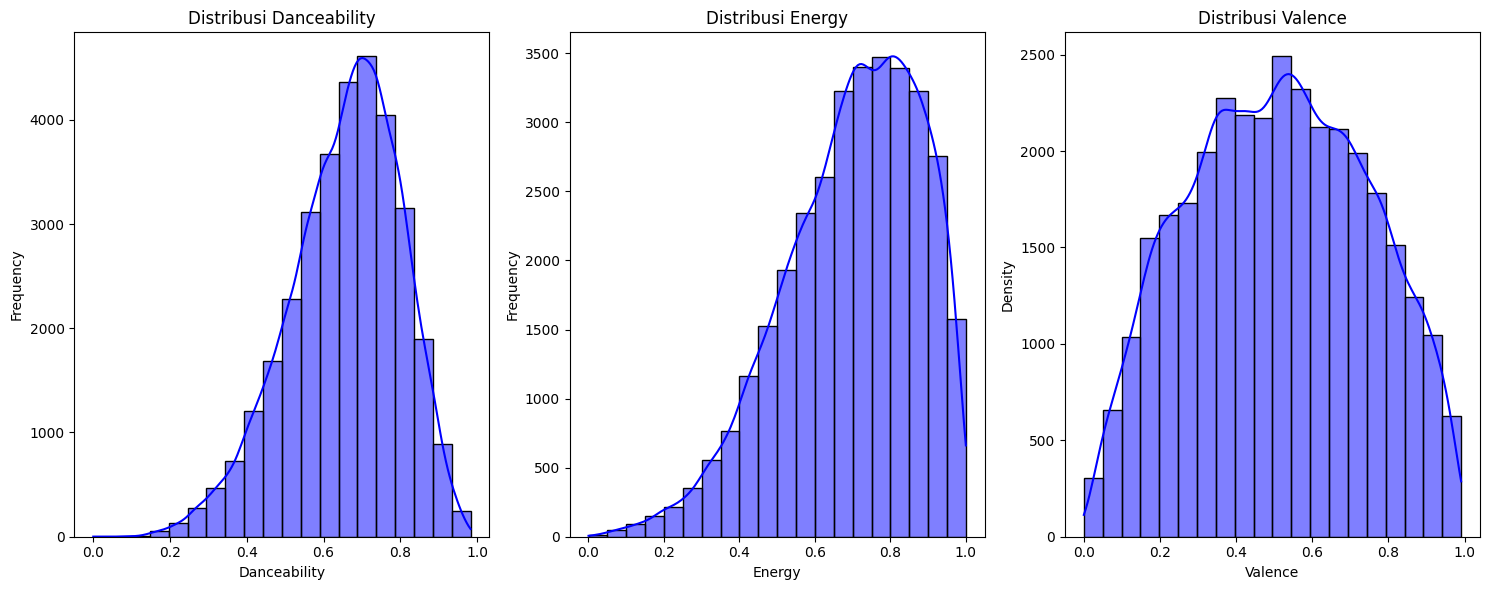

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(df['danceability'], kde=True, bins=20, color='blue', ax=axes[0])
axes[0].set_title("Distribusi Danceability")
axes[0].set_xlabel("Danceability")
axes[0].set_ylabel("Frequency")


sns.histplot(x=df['energy'], kde=True, color='blue', bins=20, ax=axes[1])
axes[1].set_title("Distribusi Energy")
axes[1].set_xlabel("Energy")
axes[1].set_ylabel("Frequency")

sns.histplot(df['valence'], kde=True, bins=20, color='blue', ax=axes[2])
axes[2].set_title('Distribusi Valence')
axes[2].set_xlabel('Valence')
axes[2].set_ylabel('Density')


plt.tight_layout()
plt.show()


Wow, these diagrams depict some really cool music! From here, we can see that the data generally has a really good level of danceability, energy, and fun.

First, look at the danceability graph. Most of the data is in the 0.6-0.8 range, with a peak around 0.7-0.75. This means that the song is really easy to dance to, which makes it even more fun! Also, the energy graph is awesome. The data is mostly at 1500-2000, with a peak at 1800-1900. This means that the music has great energy and intensity, perfect for making the atmosphere more lively.

Last but not least, the valence graph. This shows the pleasure level of the data. Most of them are in the 1200-1600 range, peaking at 1400-1500. This means that the song is fun, makes you happy, and has a very positive vibe.

Overall, from these three diagrams, it can be seen that the analyzed data has great characteristics. The danceability, energy, and valence are high, so it must be good music to listen to and dance to. This is the kind of music that's just fun to listen to, and makes the atmosphere even more exciting!

### genre

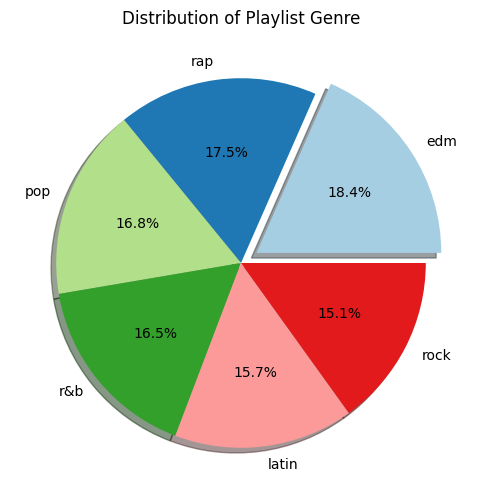

In [23]:
genre_counts = df['playlist_genre'].value_counts()
explode = [0.1 if i == genre_counts.values.argmax() else 0 for i in range(len(genre_counts))]
plt.figure(figsize=(12, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, explode=explode, shadow=True)
plt.title('Distribution of Playlist Genre')
plt.show()

The pie chart above shows that the EDM genre has the highest number of songs, followed by the rap genre. As we know, higher loudness often correlates with higher energy levels. Therefore, let us examine the influence of EDM, rap, and pop genres on energy and danceability features.

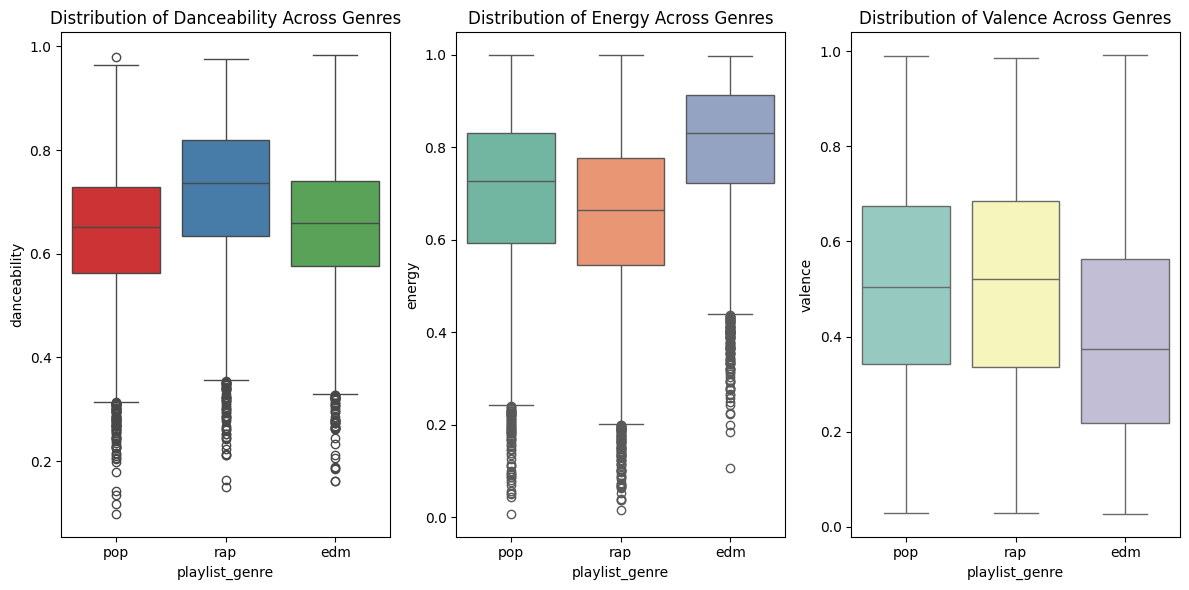

In [39]:
genres = df[df['playlist_genre'].isin(['edm','rap','pop'])]
genres_stat = genres.groupby('playlist_genre')[['danceability', 'energy', 'valence']].mean()

fig, ax = plt.subplots(1,3, figsize=(12,6))

sns.boxplot(data=genres, x='playlist_genre', y='danceability', palette='Set1', ax=ax[0])
ax[0].set_title('Distribution of Danceability Across Genres')

sns.boxplot(data=genres, x='playlist_genre', y='energy', palette='Set2',ax=ax[1])
ax[1].set_title('Distribution of Energy Across Genres')

sns.boxplot(data=genres, x='playlist_genre', y='valence', palette='Set3',ax=ax[2])
ax[2].set_title('Distribution of Valence Across Genres')

plt.tight_layout()
plt.show()

In the distribution of danceability across genres diagram, it can be seen that the pop genre has the highest median danceability value, indicating that pop songs tend to be easier to dance to. The rap genre is somewhere in the middle, while EDM has the widest variety, with some songs being very easy to dance to and others being more difficult.

Otherwise, on the distribution of energy across genres diagram, a similar pattern is seen, with pop genres having the highest energy in general, rap being in the middle, and EDM showing the most variety, with some very energetic songs and some more subdued ones.

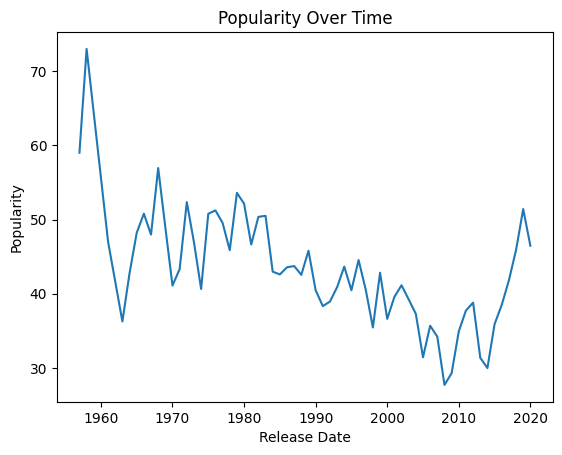

In [18]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year
popularity_by_year = df.groupby('release_year')['track_popularity'].mean().reset_index()
sns.lineplot(x=popularity_by_year['release_year'], y=popularity_by_year['track_popularity'], data=df)
plt.title('Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()

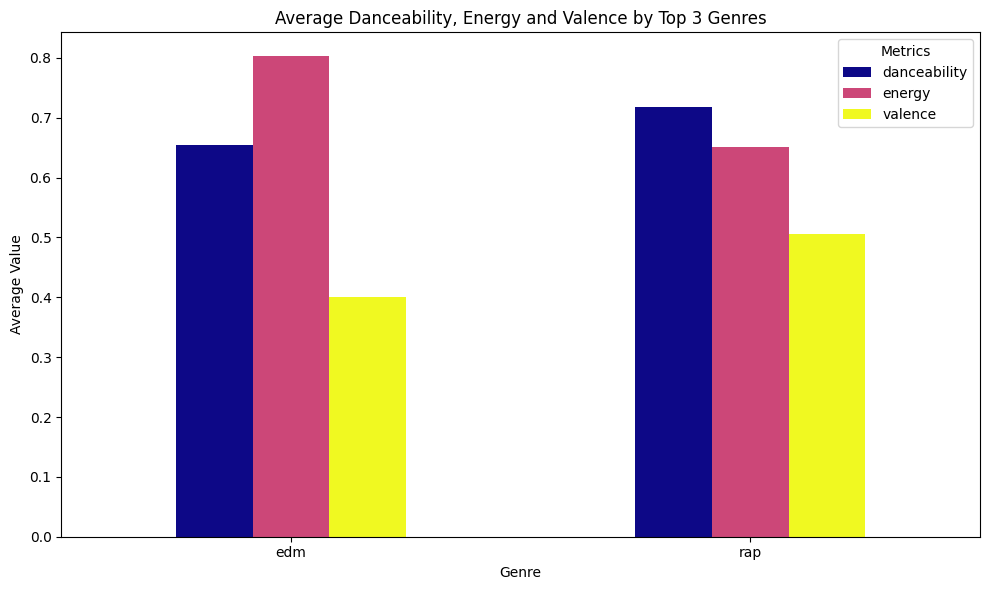

In [19]:
top_genre = df['playlist_genre'].value_counts().head(2).index
filtered = df[df['playlist_genre'].isin(top_genre)]
averages = filtered.groupby('playlist_genre')[['danceability', 'energy', 'valence']].mean()
averages.plot(kind='bar', figsize=(10,6), colormap='plasma')
plt.title('Average Danceability, Energy and Valence by Top 3 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

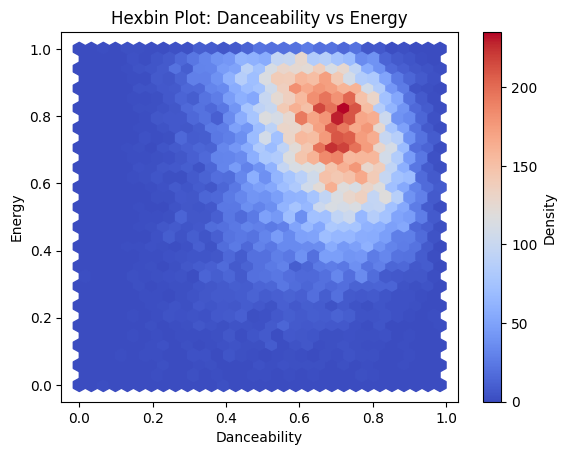

In [20]:
plt.hexbin(df['danceability'], df['energy'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Density')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Hexbin Plot: Danceability vs Energy')
plt.show()


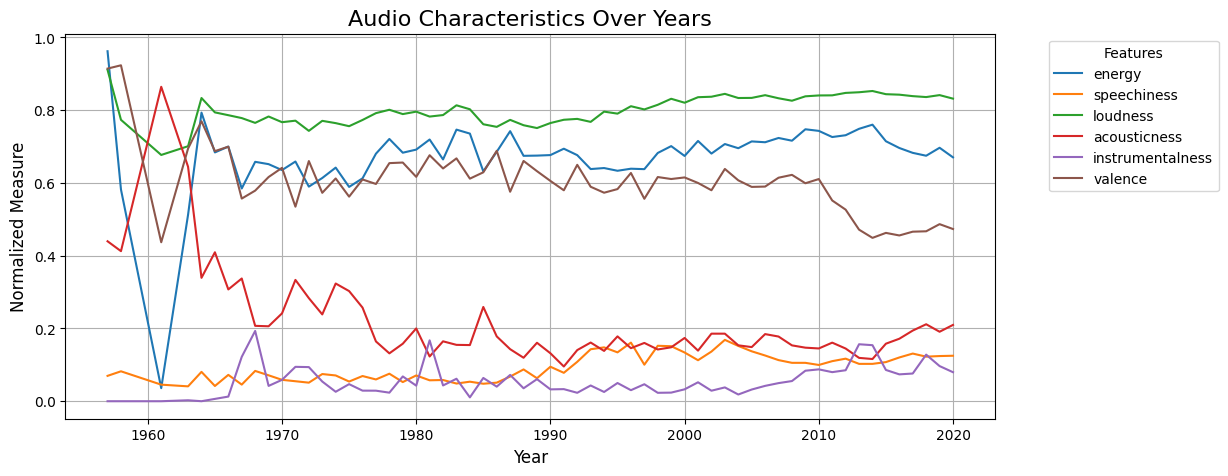

In [21]:
columns = ['energy', 'speechiness', 'loudness', 'acousticness', 'instrumentalness', 'valence']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
plt.figure(figsize=(12, 5))

for col in columns:
    x = df.groupby('release_year')[col].mean()
    sns.lineplot(x=x.index, y=x, label=col)

plt.title('Audio Characteristics Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Measure', fontsize=12)
plt.legend(title='Features', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
